# Project One

Team Members:





Project Description 

# Initial Code

## Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [129]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [130]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

,Time stamp,Date,device,energy,Total Cost
0,01/01/2020 00:00,01/01/2020,COMP_REF1,0.0000,0.000000
195,01/01/2020 16:00,01/01/2020,COMP_REF9,1.4900,2.474294
194,01/01/2020 16:00,01/01/2020,TUNEL1,0.1372,0.227834
193,01/01/2020 16:00,01/01/2020,TUNEL3,0.2318,0.384927
192,01/01/2020 16:00,01/01/2020,COMP_REF4,0.2772,0.460318


## Daily data 

In [131]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True,  format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


# Analysis 

## What are the main climate variables that affect the factory production? 

In [132]:
# José/Jorge

In [133]:
# Graficar producto A y B VS Climate 

In [134]:
from scipy.stats import linregress
import scipy.stats as st

In [135]:
def scatter_plot(xvalues, yvalues, zvalues, xlabel, ylabel, zlabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    (slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(xvalues, zvalues)
    regress_values = xvalues * slope + intercept
    regress_values_z = xvalues * slope2 + intercept2
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq_2 = "z = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    plt.plot(xvalues,regress_values_z,"b-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.annotate(line_eq_2,(lim_x_annot,yvalues.max()/3*2),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.scatter(xvalues, zvalues, color="blue", alpha=0.5)
    plt.title(f"{xlabel} vs Production")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
    corr=round(st.pearsonr(xvalues,zvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,zvalues)
 
    print(f"""|{zlabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)

In [136]:
grouped_data = daily_data.groupby("Date")[["Product_A","Product_B","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
grouped_data

,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,,,,,,,,,,
2019-03-01,357800.0,340036.200,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,323960.0,314865.300,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,78460.0,20084.850,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,200500.0,394474.275,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,303460.0,425879.850,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,468050.0,455990.900,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,417640.0,431775.900,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,377125.0,410920.426,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


|Product A Vs Temperature| 
    The correlation is 0.01
    The LinregressResult(slope=297.4392562909667, intercept=290906.770292002, rvalue=0.008205678099851831, pvalue=0.8756787158859454, stderr=1899.8464293295829)
    
|Product B Vs Temperature| 
    The correlation is -0.01
    The LinregressResult(slope=-510.36422516070706, intercept=326970.64977782866, rvalue=-0.011358102223937645, pvalue=0.8285536110280032, stderr=2355.026205474438)
    


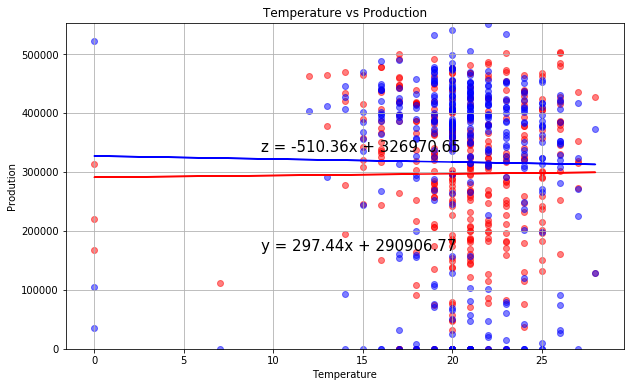

In [137]:
x_values = grouped_data["Temp"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Temperature"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs UV| 
    The correlation is 0.06
    The LinregressResult(slope=9292.532665648296, intercept=246730.56217308942, rvalue=0.06489530239119139, pvalue=0.215501324819531, stderr=7489.5154176354945)
    
|Product B Vs UV| 
    The correlation is -0.03
    The LinregressResult(slope=-5832.882822529161, intercept=348040.0156022685, rvalue=-0.03286031901194168, pvalue=0.5308731118498909, stderr=9298.784486651557)
    


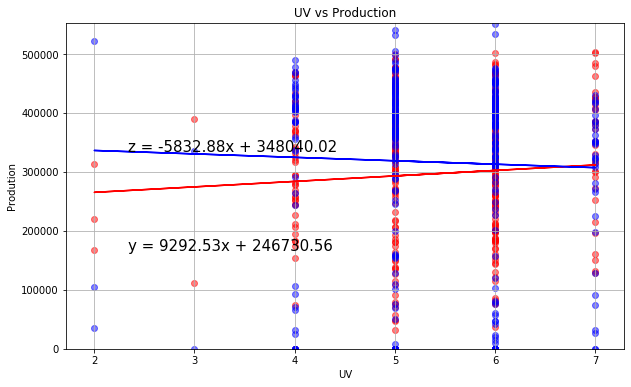

In [138]:
x_values = grouped_data["UV"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "UV"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Humidity| 
    The correlation is -0.33
    The LinregressResult(slope=-2350.058283162385, intercept=414857.4112576856, rvalue=-0.3253800667279515, pvalue=1.7944249291540392e-10, stderr=357.9618958233763)
    
|Product B Vs Humidity| 
    The correlation is 0.07
    The LinregressResult(slope=643.25577823461, intercept=284216.71599075594, rvalue=0.07184645860078613, pvalue=0.17019577671702457, stderr=468.0624913261332)
    


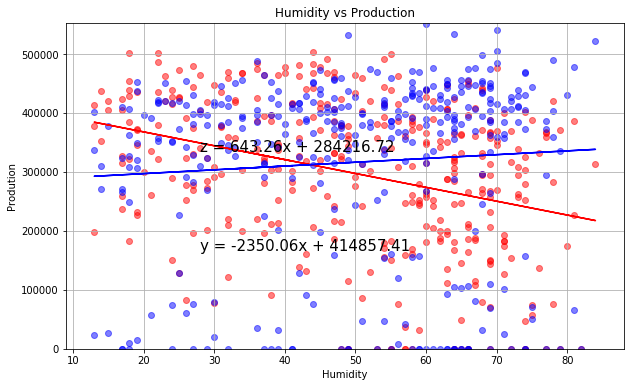

In [139]:
x_values = grouped_data["Hum"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Humidity"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Precipitation mm| 
    The correlation is -0.24
    The LinregressResult(slope=-7069.499104706693, intercept=310748.81183055637, rvalue=-0.24343625542986608, pvalue=2.448681657942203e-06, stderr=1476.3428286745614)
    
|Product B Vs Precipitation mm| 
    The correlation is -0.05
    The LinregressResult(slope=-1678.8071339866378, intercept=319727.6760300112, rvalue=-0.04663444157032843, pvalue=0.3736798143242378, stderr=1884.8230046645374)
    


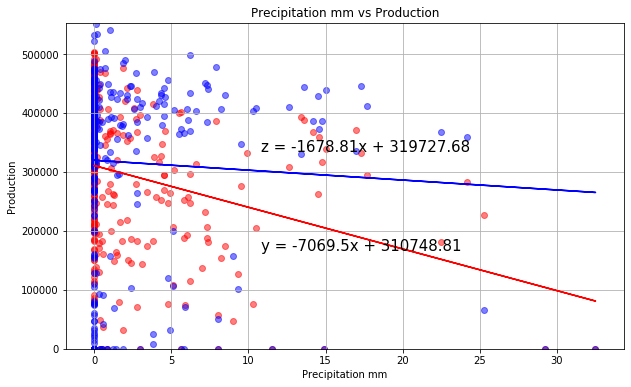

In [140]:
x_values = grouped_data["PrecMM"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Precipitation mm"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Heat| 
    The correlation is -0.04
    The LinregressResult(slope=-1880.4685239184669, intercept=335705.08200562355, rvalue=-0.04135264904516574, pvalue=0.43025578453621105, stderr=2381.4441032163722)
    
|Product B Vs Heat| 
    The correlation is -0.05
    The LinregressResult(slope=-2697.2670990409756, intercept=371947.353990657, rvalue=-0.04784874832049002, pvalue=0.36135189848928895, stderr=2951.2428805245877)
    


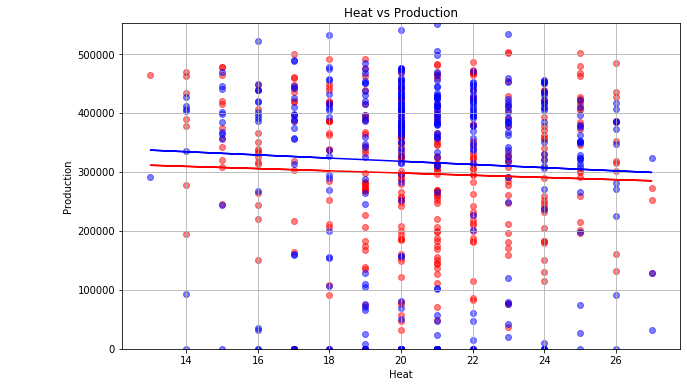

In [141]:
x_values = grouped_data["Heat"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Heat"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Dew Point| 
    The correlation is -0.36
    The LinregressResult(slope=-7828.341853242665, intercept=354541.81477969815, rvalue=-0.3578348807224887, pvalue=1.6963672250638098e-12, stderr=1070.7380966144765)
    
|Product B Vs Dew Point| 
    The correlation is 0.06
    The LinregressResult(slope=1546.618236732594, intercept=305106.143170563, rvalue=0.05703026318369269, pvalue=0.2765037744193915, stderr=1419.1217210870284)
    


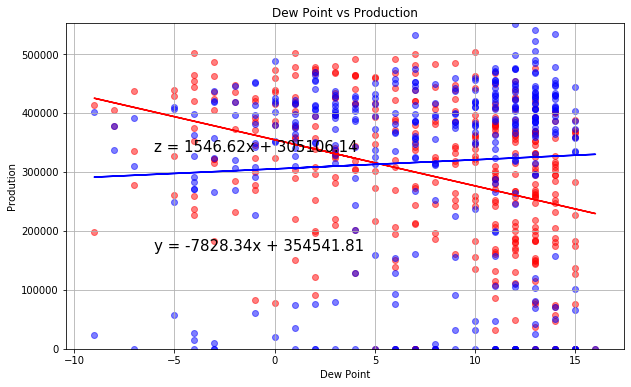

In [142]:
x_values = grouped_data["DP"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Dew Point"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Wind Chill| 
    The correlation is -0.01
    The LinregressResult(slope=-453.76866533259977, intercept=306225.1439729578, rvalue=-0.0104500236207811, pvalue=0.8420732126099256, stderr=2275.8457541550083)
    
|Product B Vs Wind Chill| 
    The correlation is -0.07
    The LinregressResult(slope=-3528.6521214056606, intercept=387996.652807947, rvalue=-0.06555426818916132, pvalue=0.21086763858682067, stderr=2815.2826784391477)
    


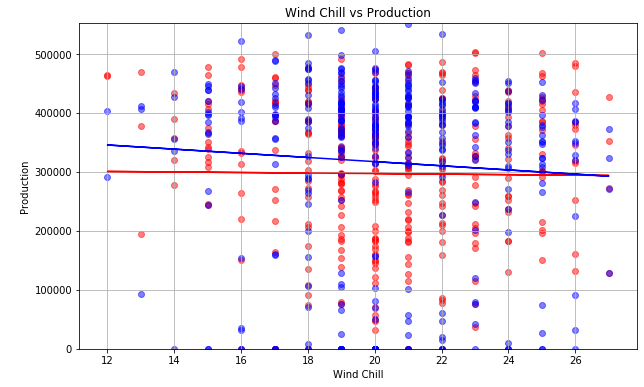

In [143]:
x_values = grouped_data["WChill"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Wind Chill"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Feel Like| 
    The correlation is -0.02
    The LinregressResult(slope=-1018.5770686754256, intercept=317693.5690655293, rvalue=-0.02351881515706643, pvalue=0.6538181017137703, stderr=2269.3820690336047)
    
|Product B Vs Feel Like| 
    The correlation is -0.06
    The LinregressResult(slope=-3488.45621278387, intercept=387248.5810795984, rvalue=-0.0649776768057967, pvalue=0.2149181257041976, stderr=2808.0164435206725)
    


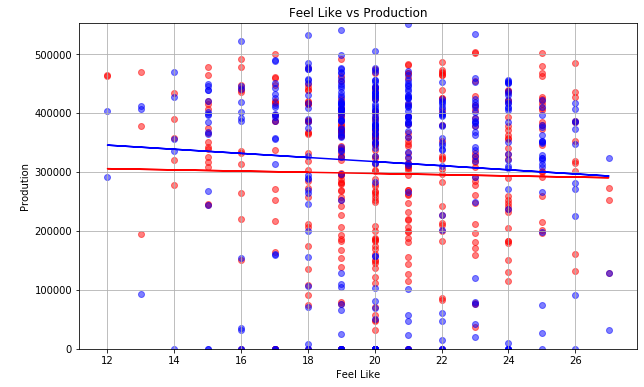

In [144]:
x_values = grouped_data["FLike"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Feel Like"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

## What are the main climate variables that affect the energy consumption?

In [145]:
# José/Jorge

In [146]:
# Graficar devices VS climate

In [147]:
comp1 =  daily_data.loc[ daily_data["device"] == "COMP_REF1", :]
devices_data = comp1.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
devices_data

,,energy,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,device,,,,,,,,,
2019-03-01,COMP_REF1,6162.9256,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,COMP_REF1,5867.5939,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,COMP_REF1,2366.0853,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,COMP_REF1,4607.5877,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,COMP_REF1,5112.1222,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,COMP_REF1,0.0005,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,COMP_REF1,0.0843,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,COMP_REF1,0.0030,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


In [148]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF: Temperature| 
    The correlation is 0.39
    The LinregressResult(slope=250.4828991702507, intercept=-1689.6501233638205, rvalue=0.3864931486828209, pvalue=1.7361843543043095e-14, stderr=31.329550385103822)
    


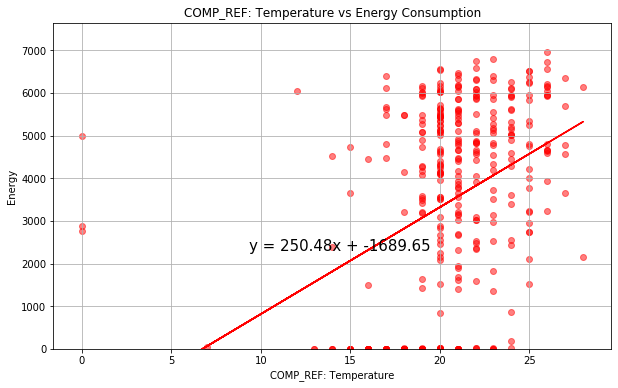

In [149]:
x_values = devices_data["Temp"]
y_values = devices_data["energy"]
x_label = "COMP_REF: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF1: Temperature| 
    The correlation is 0.3
    The LinregressResult(slope=757.382661915389, intercept=-634.9734556130757, rvalue=0.29582988985238584, pvalue=7.934248702394142e-09, stderr=128.1844680013485)
    


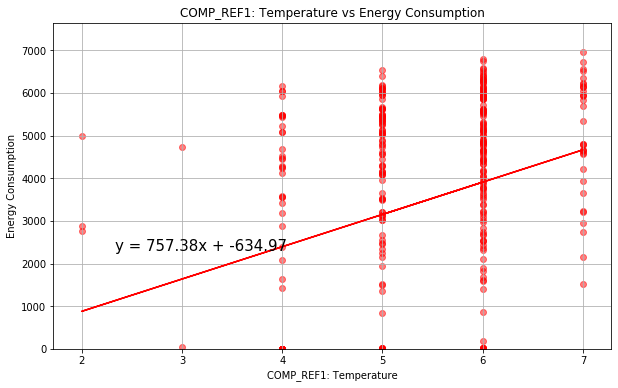

In [150]:
x_values = devices_data["UV"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Precipitation MM| 
    The correlation is -0.03
    The LinregressResult(slope=-14.036732591082519, intercept=3491.6570036412704, rvalue=-0.02703399134533773, pvalue=0.6061926357987214, stderr=27.20485446575832)
    


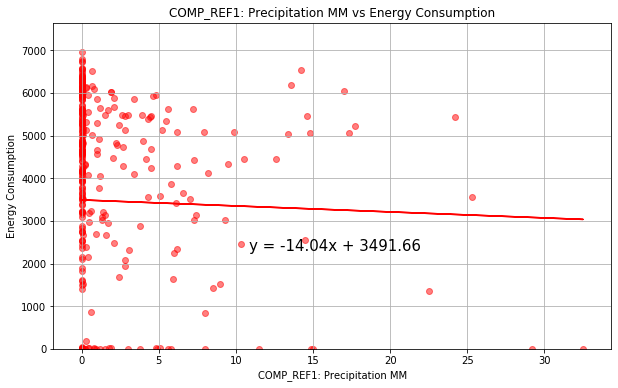

In [151]:
x_values = devices_data["PrecMM"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Humidity| 
    The correlation is -0.14
    The LinregressResult(slope=-17.52598931904319, intercept=4343.153547797163, rvalue=-0.13571954098573294, pvalue=0.009332571864696501, stderr=6.705827303694501)
    


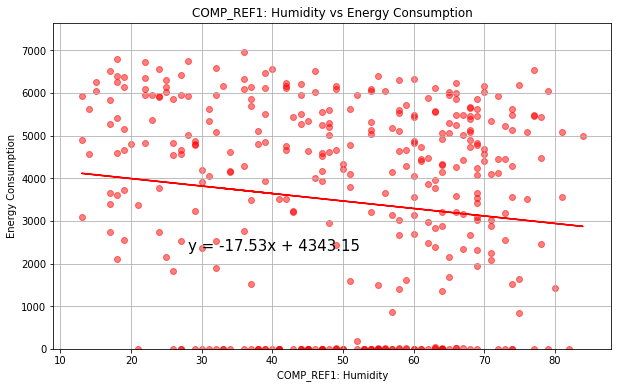

In [152]:
x_values = devices_data["Hum"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Heat| 
    The correlation is 0.42
    The LinregressResult(slope=343.0189370800804, intercept=-3590.9065296143303, rvalue=0.4218935568270983, pvalue=3.146309126635151e-17, stderr=38.636872088988945)
    


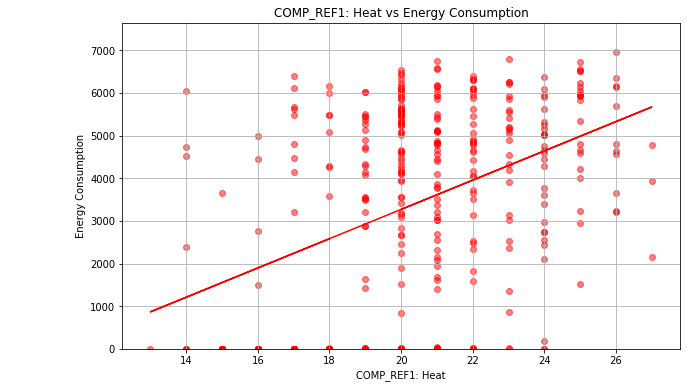

In [153]:
x_values = devices_data["Heat"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Dew Point| 
    The correlation is -0.02
    The LinregressResult(slope=-8.480358631327501, intercept=3526.717084315955, rvalue=-0.021680766754204363, pvalue=0.6793082505329673, stderr=20.496834500001764)
    


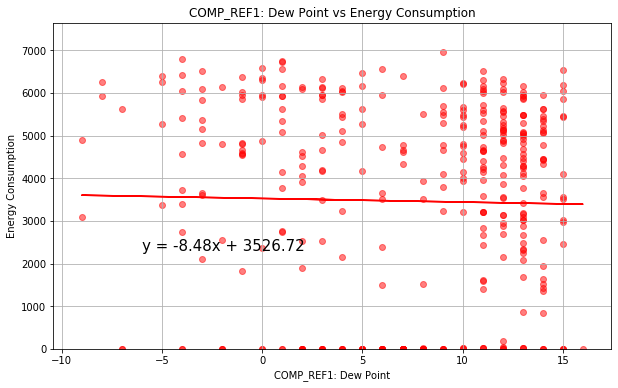

In [154]:
x_values = devices_data["DP"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Wind Chill| 
    The correlation is 0.43
    The LinregressResult(slope=333.5799696986747, intercept=-3297.4181057225883, rvalue=0.429665282077171, pvalue=7.098216457018653e-18, stderr=36.74524098783027)
    


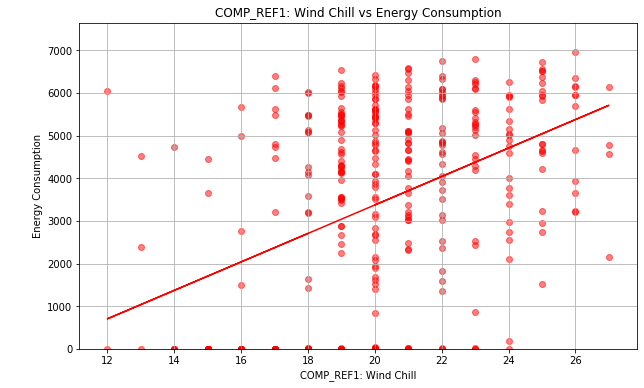

In [155]:
x_values = devices_data["WChill"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Feel Like| 
    The correlation is 0.42
    The LinregressResult(slope=325.4159557722367, intercept=-3138.1533307776776, rvalue=0.42025018804923586, pvalue=4.289552178436829e-17, stderr=36.82841014548484)
    


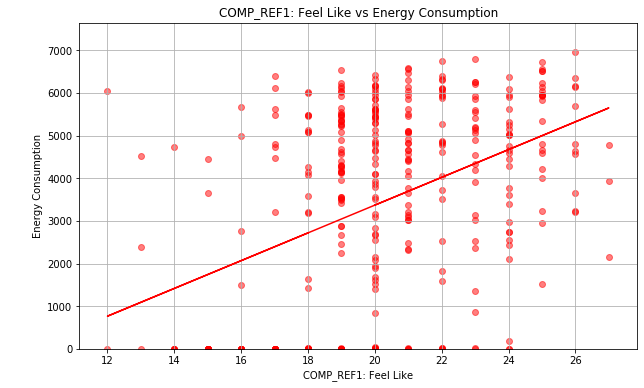

In [156]:
x_values = devices_data["FLike"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

In [157]:
comp2 =  daily_data.loc[ daily_data["device"] == "COMP_REF2", :]
devices_data2 = comp2.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
devices_data2

,,energy,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,device,,,,,,,,,
2019-03-01,COMP_REF2,6476.8864,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,COMP_REF2,6084.0749,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,COMP_REF2,2564.2945,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,COMP_REF2,4888.2142,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,COMP_REF2,5340.9948,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,COMP_REF2,5730.2421,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,COMP_REF2,5452.7704,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,COMP_REF2,5992.0897,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


In [158]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="blue", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E7E165780>,
      dtype=object)

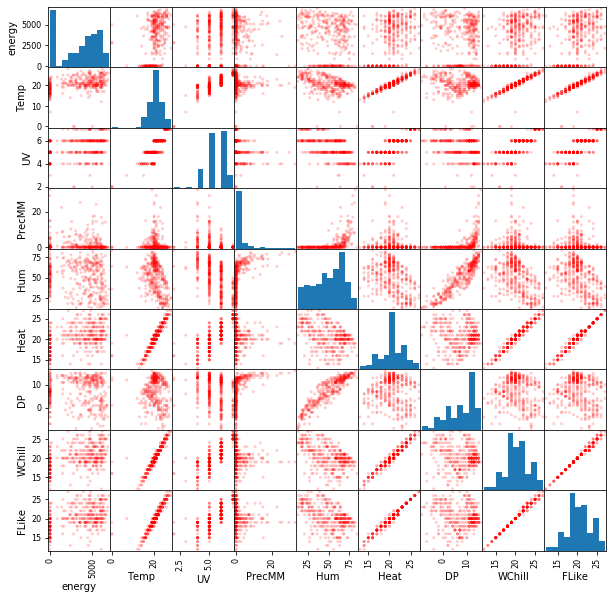

In [159]:
pd.plotting.scatter_matrix(devices_data.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "red")

|Energy Consumption Vs COMP_REF2: Temperature| 
    The correlation is 0.07
    The LinregressResult(slope=36.91466303306399, intercept=3992.9258308688395, rvalue=0.07237532091531501, pvalue=0.16706455492309422, stderr=26.663506754098236)
    


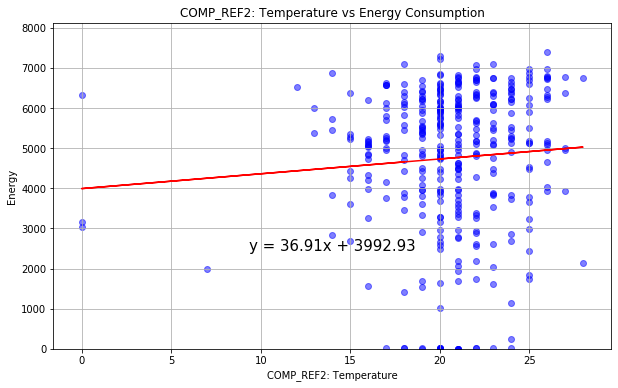

In [160]:
x_values = devices_data2["Temp"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF2: UV| 
    The correlation is 0.09
    The LinregressResult(slope=176.16736623645068, intercept=3798.982592583583, rvalue=0.08743393612855554, pvalue=0.09488221676818223, stderr=105.20305170929495)
    


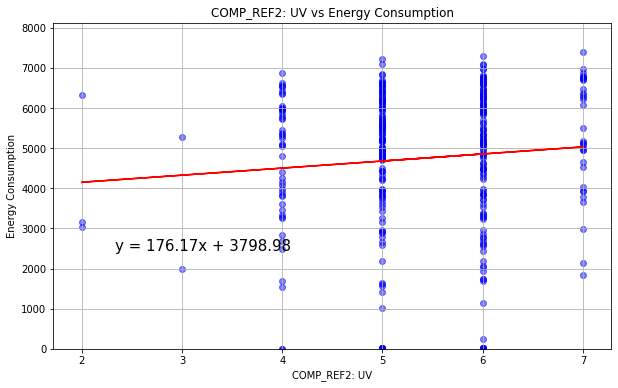

In [161]:
x_values = devices_data2["UV"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Precipitation MM| 
    The correlation is -0.19
    The LinregressResult(slope=-76.76394123998817, intercept=4901.498047149967, rvalue=-0.1878578224957713, pvalue=0.0003016675782588847, stderr=21.03660015204468)
    


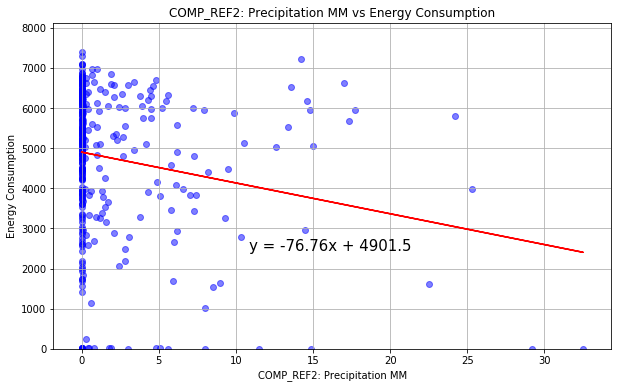

In [162]:
x_values = devices_data2["PrecMM"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Humidity| 
    The correlation is -0.21
    The LinregressResult(slope=-21.34325091097763, intercept=5822.637100730466, rvalue=-0.21001401855770319, pvalue=5.136898876535001e-05, stderr=5.207946165535617)
    


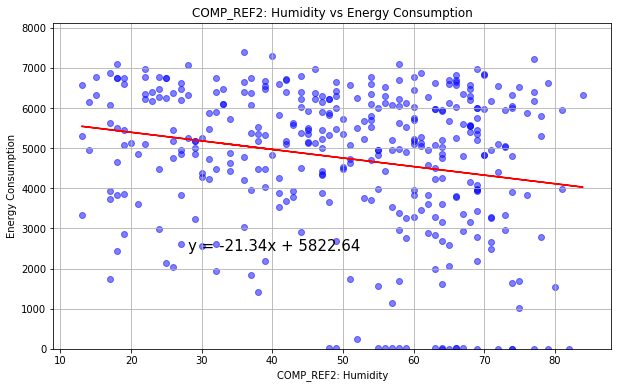

In [163]:
x_values = devices_data2["Hum"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Heat| 
    The correlation is 0.04
    The LinregressResult(slope=24.77091529257871, intercept=4243.004729719857, rvalue=0.03871281265762771, pvalue=0.46029382042696587, stderr=33.51281875253406)
    


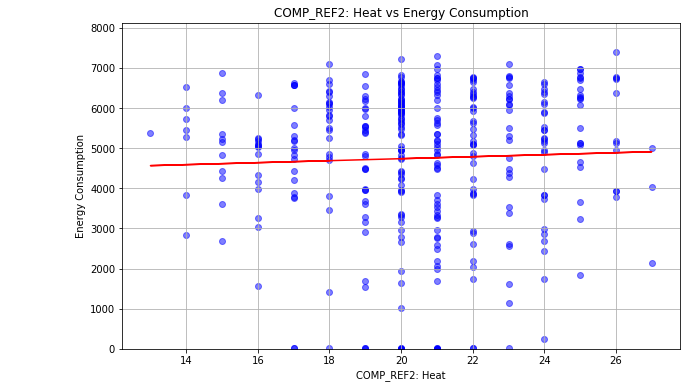

In [164]:
x_values = devices_data2["Heat"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()


|Energy Consumption Vs COMP_REF2: Dew Point| 
    The correlation is -0.2
    The LinregressResult(slope=-63.00401269810031, intercept=5215.390632637136, rvalue=-0.20467109094621927, pvalue=8.012547954853052e-05, stderr=15.79314572530391)
    


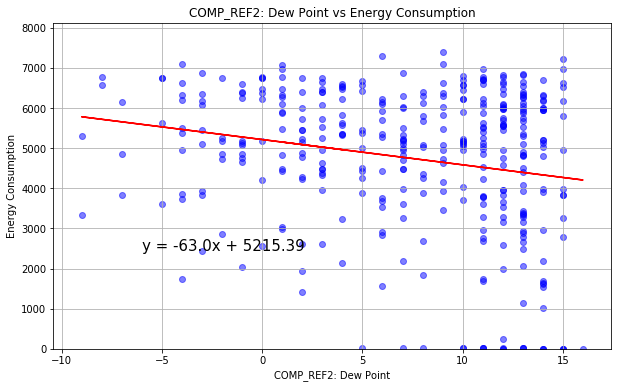

In [165]:
x_values = devices_data2["DP"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Wind Chill| 
    The correlation is 0.06
    The LinregressResult(slope=37.82887249667536, intercept=3985.690645757283, rvalue=0.06191296047936224, pvalue=0.23738556939356129, stderr=31.963708610182966)
    


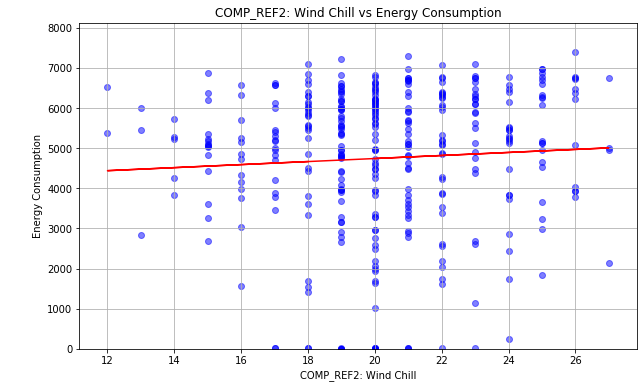

In [166]:
x_values = devices_data2["WChill"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Feel Like| 
    The correlation is 0.05
    The LinregressResult(slope=31.8736196202828, intercept=4105.796945627814, rvalue=0.05230320886276579, pvalue=0.3183377151787274, stderr=31.897563590392448)
    


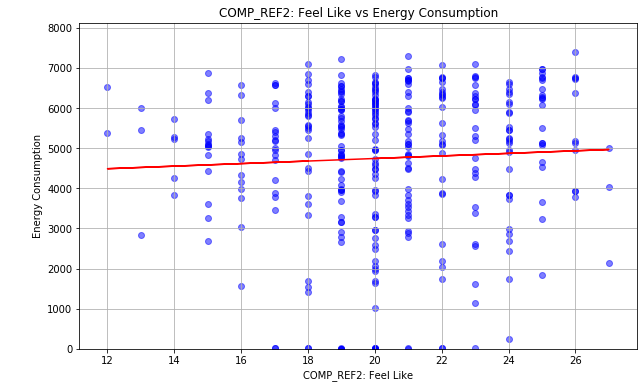

In [167]:
x_values = devices_data2["FLike"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E7FDB5710>,
      dtype=object)

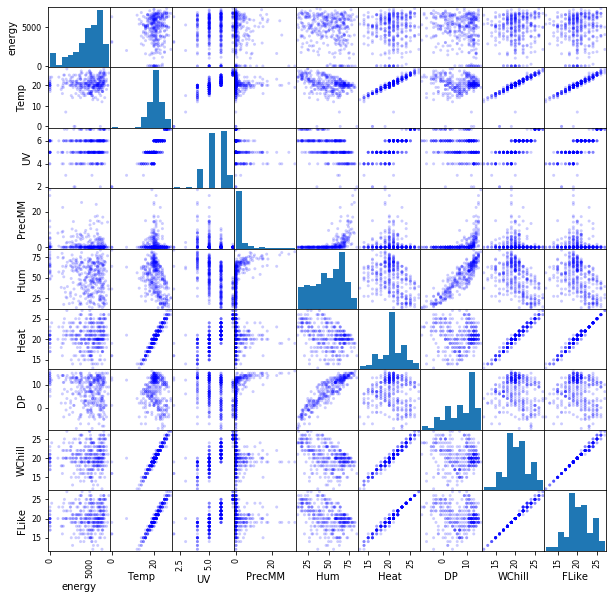

In [168]:
pd.plotting.scatter_matrix(devices_data2.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "blue")

In [169]:
comp4 =  daily_data.loc[ daily_data["device"] == "COMP_REF4", :]
devices_data4 = comp4.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
devices_data4

,,energy,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,device,,,,,,,,,
2019-03-01,COMP_REF4,0.0000,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,COMP_REF4,0.0000,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,COMP_REF4,0.0000,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,COMP_REF4,0.0000,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,COMP_REF4,0.0000,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,COMP_REF4,6.8646,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,COMP_REF4,6.8006,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,COMP_REF4,6.8790,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


In [170]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="green", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF4: Temperature| 
    The correlation is -0.07
    The LinregressResult(slope=-35.47155501949818, intercept=2537.021205879347, rvalue=-0.07175971124195947, pvalue=0.17071353387711805, stderr=25.842098307085244)
    


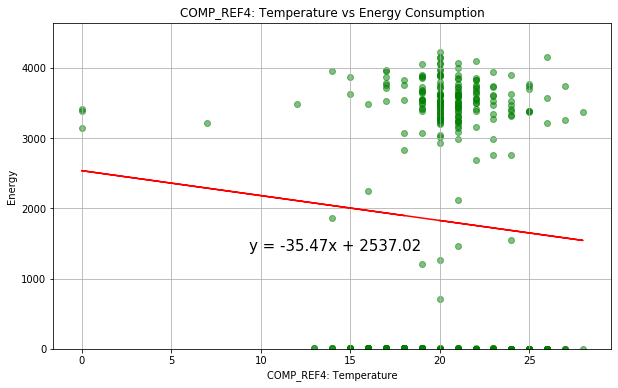

In [171]:
x_values = devices_data4["Temp"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF4: UV| 
    The correlation is -0.17
    The LinregressResult(slope=-332.55902115069756, intercept=3607.139074862109, rvalue=-0.17030686810165924, pvalue=0.0010718899464109116, stderr=100.85431948670227)
    


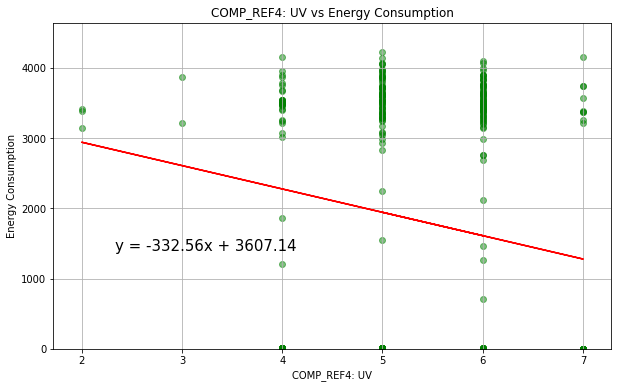

In [172]:
x_values = devices_data4["UV"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Precipitation MM| 
    The correlation is 0.21
    The LinregressResult(slope=82.9352006991657, intercept=1646.1647921401986, rvalue=0.20942078366350958, pvalue=5.3998442435306416e-05, stderr=20.296905887521547)
    


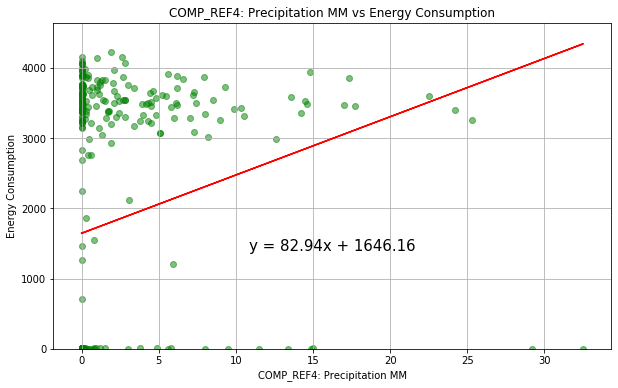

In [173]:
x_values = devices_data4["PrecMM"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Humidity| 
    The correlation is 0.61
    The LinregressResult(slope=59.722310657018, intercept=-1187.2968370681344, rvalue=0.6063636773726384, pvalue=4.0480516760659365e-38, stderr=4.1050859349671525)
    


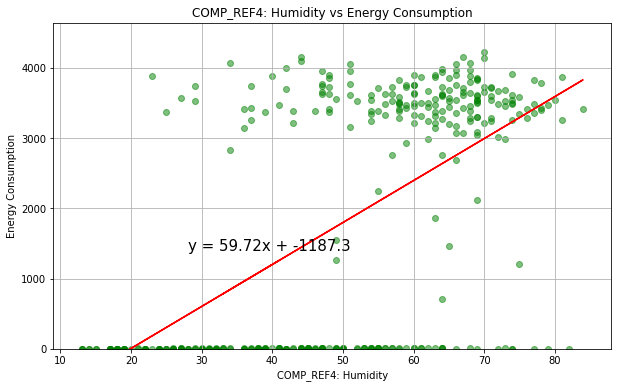

In [174]:
x_values = devices_data4["Hum"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Heat| 
    The correlation is -0.02
    The LinregressResult(slope=-14.442791298836951, intercept=2104.204408190286, rvalue=-0.023290170511868255, pvalue=0.6569678996419184, stderr=32.49450728599861)
    


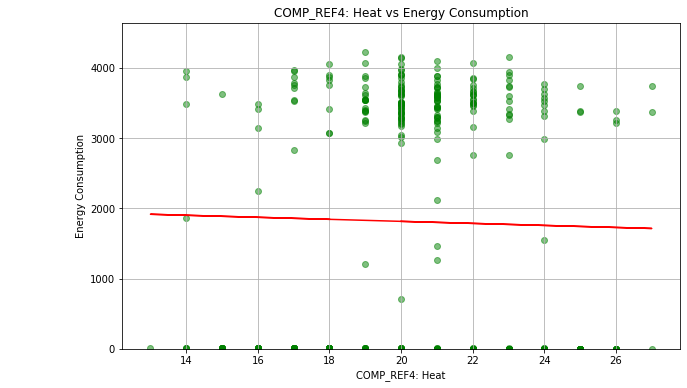

In [175]:
x_values = devices_data4["Heat"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Dew Point| 
    The correlation is 0.65
    The LinregressResult(slope=194.31635191237604, intercept=379.49948144158725, rvalue=0.6513381305105873, pvalue=1.4772471174210568e-45, stderr=11.86512683692766)
    


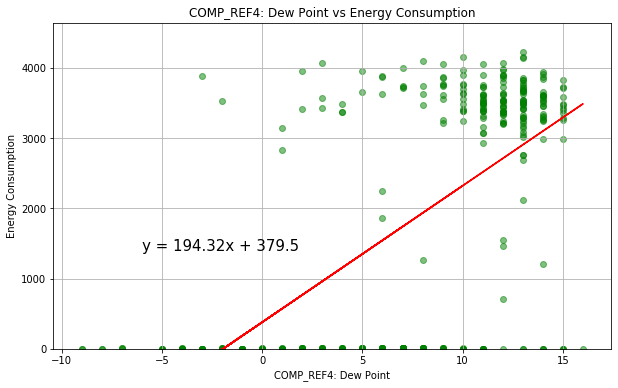

In [176]:
x_values = devices_data4["DP"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Wind Chill| 
    The correlation is -0.09
    The LinregressResult(slope=-53.790268087957315, intercept=2897.4958454769276, rvalue=-0.09083866508463855, pvalue=0.08265387037243387, stderr=30.908861887719087)
    


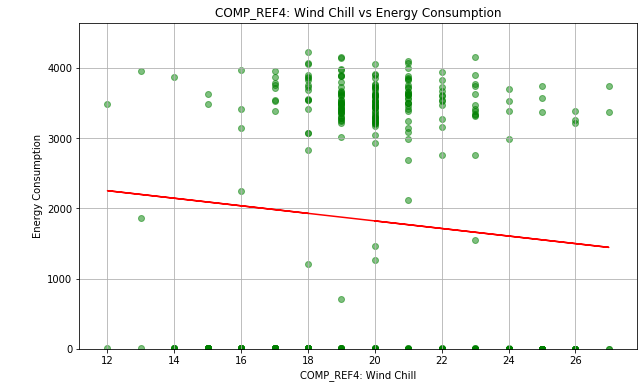

In [177]:
x_values = devices_data4["WChill"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Feel Like| 
    The correlation is -0.07
    The LinregressResult(slope=-43.83064429051967, intercept=2696.447663938249, rvalue=-0.07421362818655766, pvalue=0.15651562194199728, stderr=30.87053949780253)
    


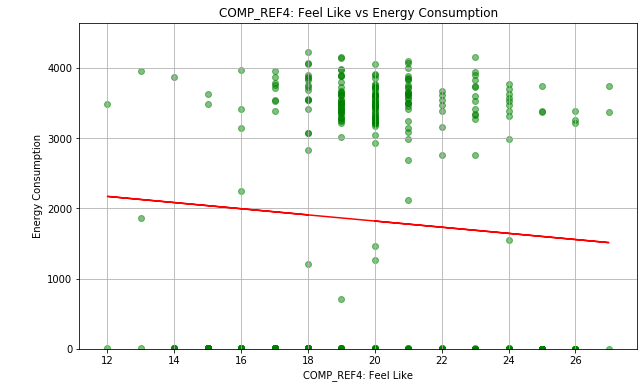

In [178]:
x_values = devices_data4["FLike"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E01B0AE80>,
      dtype=object)

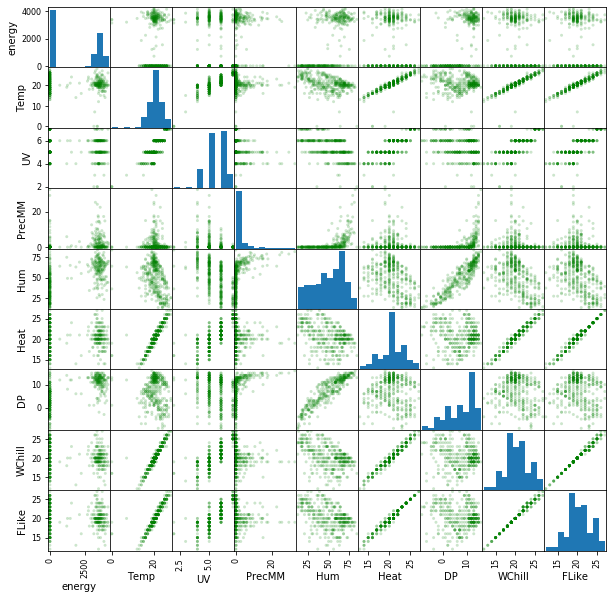

In [179]:
pd.plotting.scatter_matrix(devices_data4.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "green")

In [180]:
comp6 =  daily_data.loc[ daily_data["device"] == "COMP_REF6", :]
devices_data6 = comp6.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
devices_data6

,,energy,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,device,,,,,,,,,
2019-03-01,COMP_REF6,0.0000,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,COMP_REF6,0.0000,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,COMP_REF6,0.0000,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,COMP_REF6,0.0000,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,COMP_REF6,0.0000,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,COMP_REF6,3323.8084,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,COMP_REF6,2591.8908,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,COMP_REF6,1209.8101,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


In [181]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="purple", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF6: Temperature| 
    The correlation is -0.01
    The LinregressResult(slope=-2.617372259602103, intercept=2164.620055702359, rvalue=-0.005806431456150193, pvalue=0.9118506565511721, stderr=23.626434065567917)
    


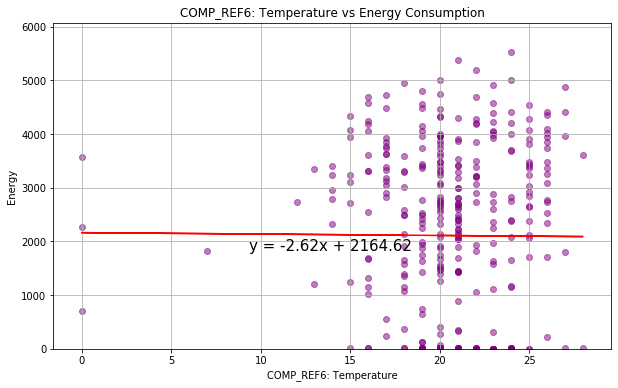

In [182]:
x_values = devices_data6["Temp"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF4: UV| 
    The correlation is 0.03
    The LinregressResult(slope=59.48707247290182, intercept=1788.7858451671625, rvalue=0.03340637712258262, pvalue=0.5240640672060018, stderr=93.2824741885611)
    


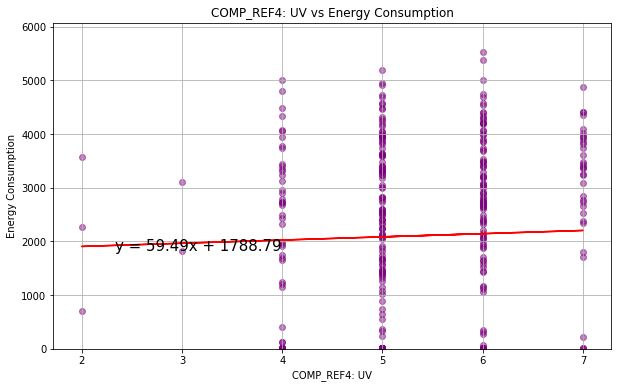

In [183]:
x_values = devices_data6["UV"]
y_values = devices_data6["energy"]
x_label = "COMP_REF4: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Precipitation MM| 
    The correlation is -0.1
    The LinregressResult(slope=-34.45915295395434, intercept=2177.6483392308446, rvalue=-0.09541767539922733, pvalue=0.06824803792599676, stderr=18.84252043445094)
    


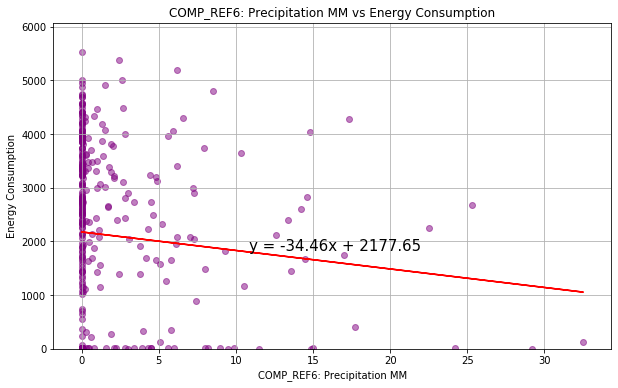

In [184]:
x_values = devices_data6["PrecMM"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Humidity| 
    The correlation is 0.04
    The LinregressResult(slope=3.891164876343612, intercept=1915.663232935023, rvalue=0.043323103743168695, pvalue=0.4085927032265304, stderr=4.703286492817954)
    


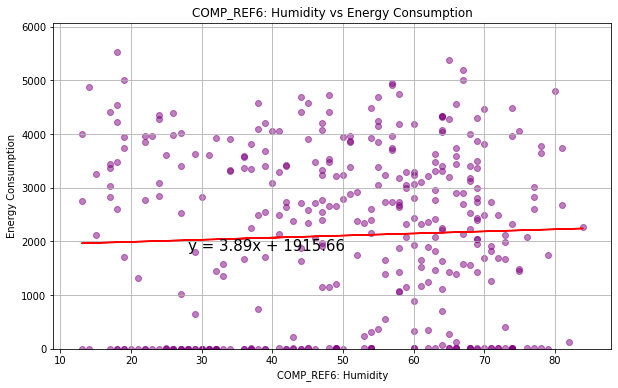

In [185]:
x_values = devices_data6["Hum"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Heat| 
    The correlation is -0.02
    The LinregressResult(slope=-13.217964709746035, intercept=2382.6348312430823, rvalue=-0.02337380810092955, pvalue=0.6558150042247655, stderr=29.63232679063863)
    


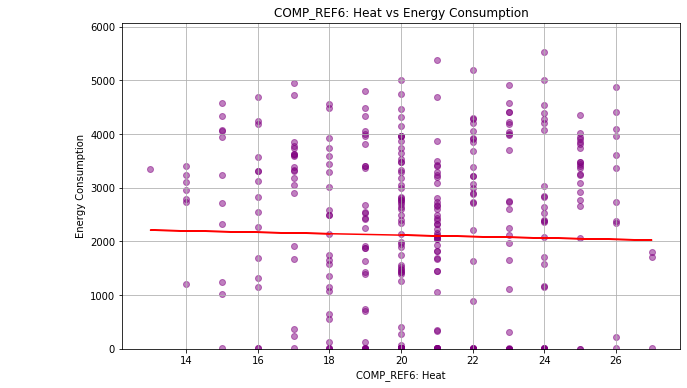

In [186]:
x_values = devices_data6["Heat"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Dew Point| 
    The correlation is 0.06
    The LinregressResult(slope=16.860290728395714, intercept=1986.8912244025792, rvalue=0.061973434879114955, pvalue=0.2369268248863439, stderr=14.232237915862468)
    


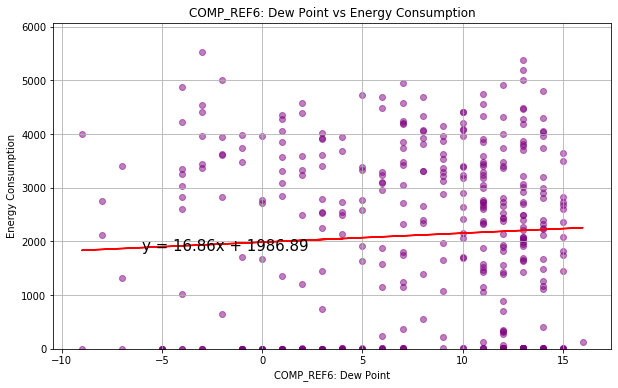

In [187]:
x_values = devices_data6["DP"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Wind Chill| 
    The correlation is -0.02
    The LinregressResult(slope=-11.20925966720752, intercept=2337.9808944563188, rvalue=-0.020758086542323535, pvalue=0.6922453522508467, stderr=28.29732164750462)
    


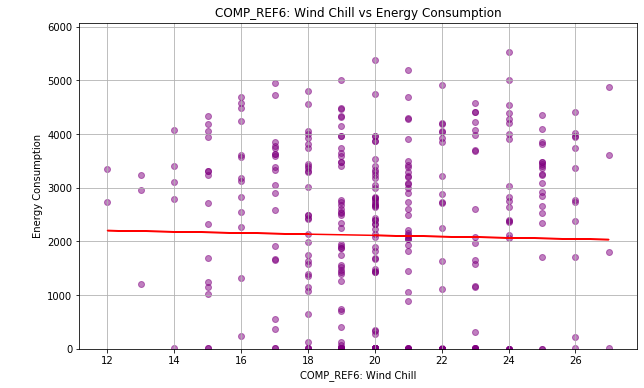

In [188]:
x_values = devices_data6["WChill"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Feel Like| 
    The correlation is -0.03
    The LinregressResult(slope=-14.377987443059178, intercept=2402.487553694419, rvalue=-0.02669606574016252, pvalue=0.6107034953927774, stderr=28.219241314411544)
    


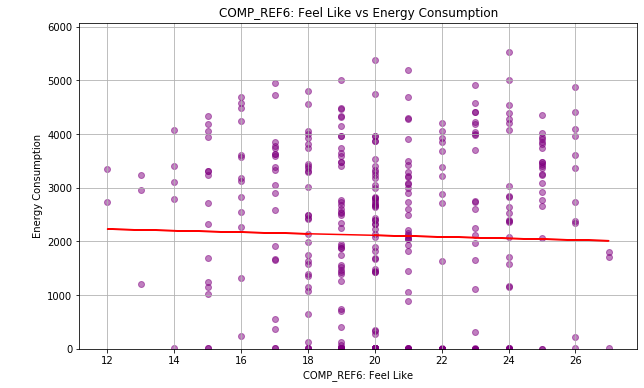

In [189]:
x_values = devices_data6["FLike"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E01746CC0>,
      dtype=object)

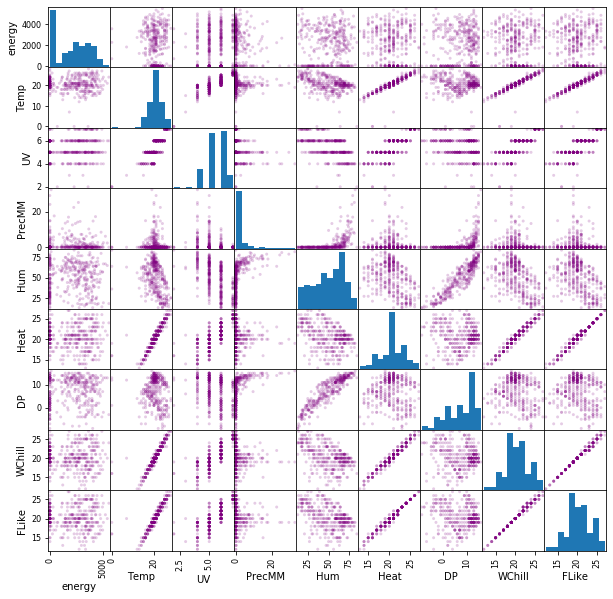

In [190]:
pd.plotting.scatter_matrix(devices_data6.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "purple")

In [191]:
comp7 =  daily_data.loc[ daily_data["device"] == "COMP_REF7", :]
devices_data7 = comp7.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
devices_data7

,,energy,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,device,,,,,,,,,
2019-03-01,COMP_REF7,5756.86,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,COMP_REF7,5789.40,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,COMP_REF7,5359.15,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,COMP_REF7,5730.81,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,COMP_REF7,5891.55,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,COMP_REF7,3819.60,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,COMP_REF7,3630.04,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,COMP_REF7,3345.10,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


In [192]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="orange", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF7: Temperature| 
    The correlation is 0.19
    The LinregressResult(slope=58.31389934117094, intercept=2492.0553518077636, rvalue=0.18816634006524252, pvalue=0.0002947088940039645, stderr=15.95333932689715)
    


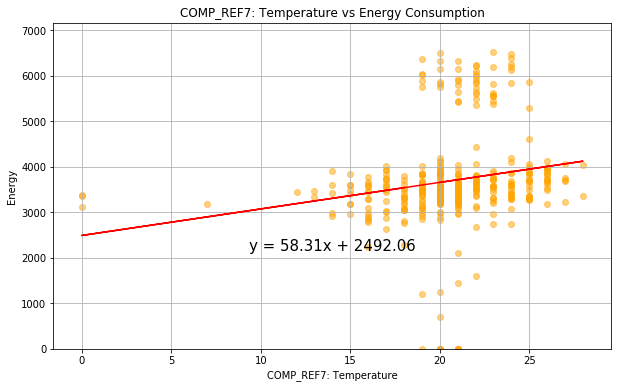

In [193]:
x_values = devices_data7["Temp"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF7: UV| 
    The correlation is 0.23
    The LinregressResult(slope=276.7505730848386, intercept=2194.0200803796024, rvalue=0.226058768964449, pvalue=1.2618417889806367e-05, stderr=62.50663428998039)
    


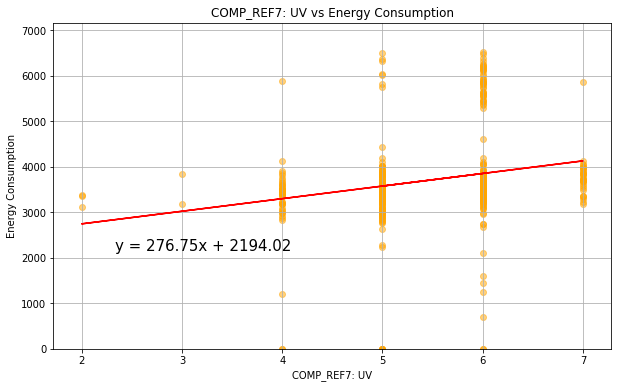

In [194]:
x_values = devices_data7["UV"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Precipitation MM| 
    The correlation is -0.31
    The LinregressResult(slope=-76.15618099909395, intercept=3839.769359786219, rvalue=-0.3067294232116946, pvalue=2.059069975348524e-09, stderr=12.386347127560663)
    


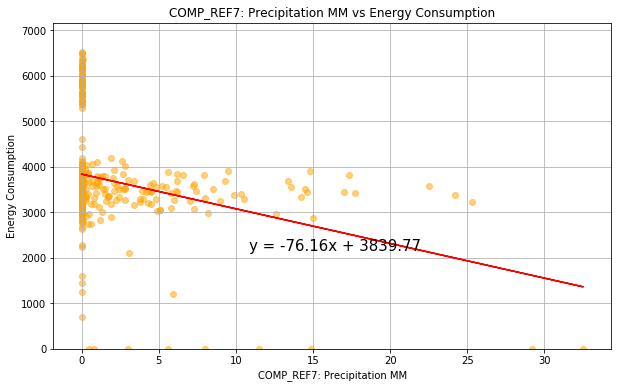

In [195]:
x_values = devices_data7["PrecMM"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Humidity| 
    The correlation is -0.47
    The LinregressResult(slope=-28.870781311660892, intercept=5139.5135042357615, rvalue=-0.46754618008274684, pvalue=2.8192978203099574e-21, stderr=2.8610153892180175)
    


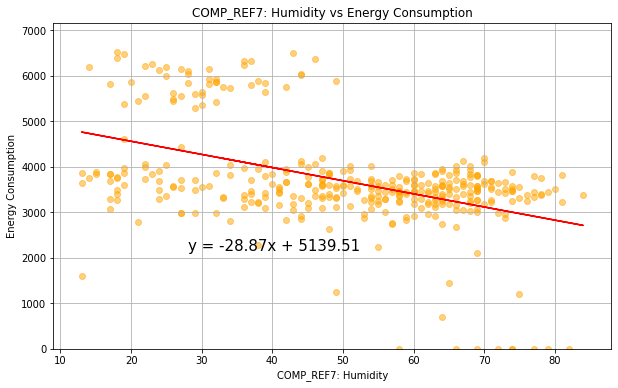

In [196]:
x_values = devices_data7["Hum"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Heat| 
    The correlation is 0.2
    The LinregressResult(slope=78.03540597574212, intercept=2086.8953511328227, rvalue=0.20071629264649601, pvalue=0.00011053983238238099, stderr=19.963149430587528)
    


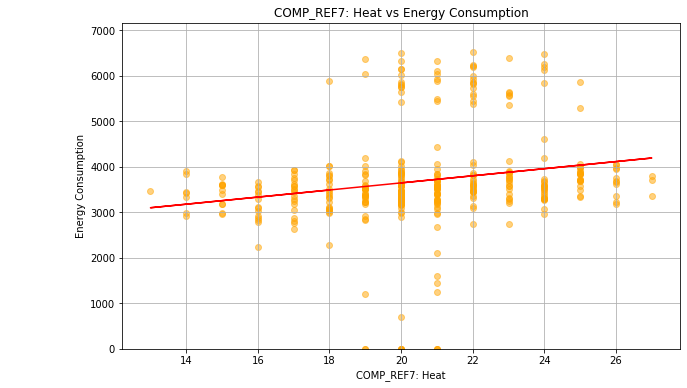

In [197]:
x_values = devices_data7["Heat"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Dew Point| 
    The correlation is -0.44
    The LinregressResult(slope=-81.80450918790955, intercept=4292.968742913356, rvalue=-0.43736477086770564, pvalue=1.5626445676021823e-18, stderr=8.816165052208863)
    


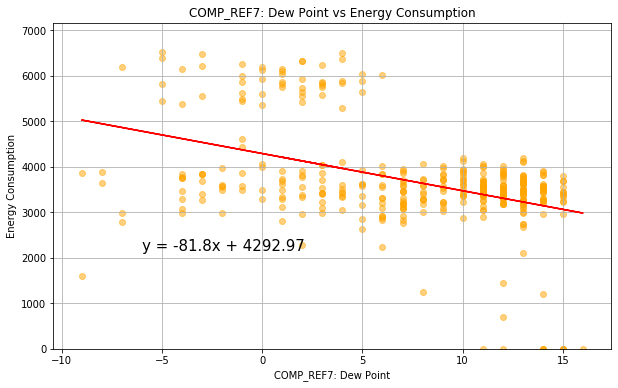

In [198]:
x_values = devices_data7["DP"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Wind Chill| 
    The correlation is 0.24
    The LinregressResult(slope=87.9033621752636, intercept=1910.1070784746428, rvalue=0.23677831263687069, pvalue=4.658081442478438e-06, stderr=18.90532532923994)
    


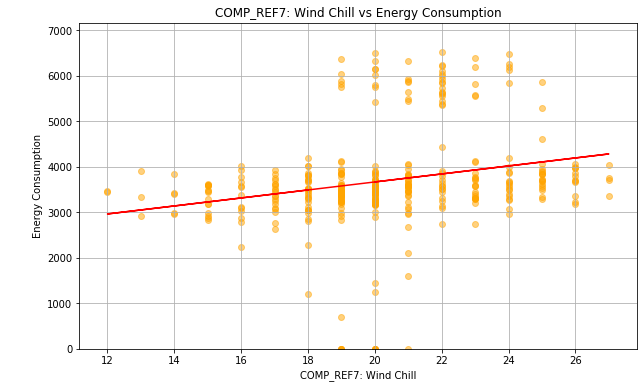

In [199]:
x_values = devices_data7["WChill"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Feel Like| 
    The correlation is -0.03
    The LinregressResult(slope=-14.377987443059178, intercept=2402.487553694419, rvalue=-0.02669606574016252, pvalue=0.6107034953927774, stderr=28.219241314411544)
    


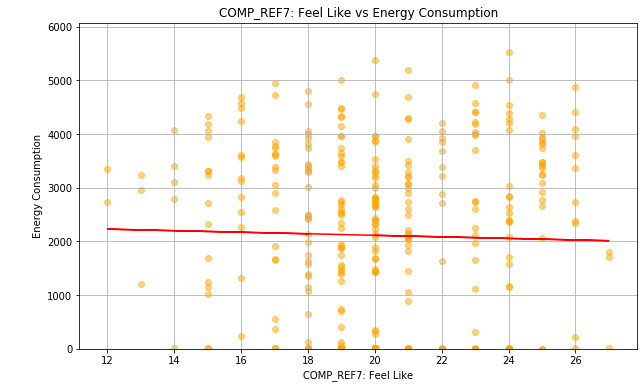

In [200]:
x_values = devices_data6["FLike"]
y_values = devices_data6["energy"]
x_label = "COMP_REF7: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E05BB92E8>,
      dtype=object)

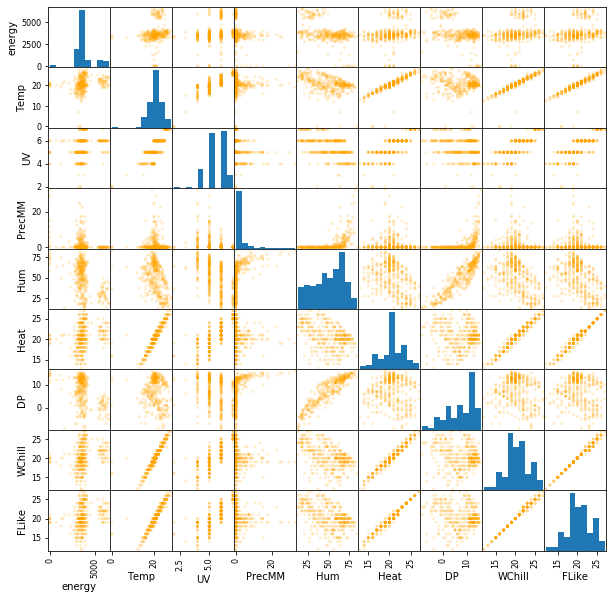

In [201]:
pd.plotting.scatter_matrix(devices_data7.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "orange")

In [202]:
comp8 =  daily_data.loc[ daily_data["device"] == "COMP_REF8", :]
devices_data8 = comp8.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
devices_data8

,,energy,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,device,,,,,,,,,
2019-03-01,COMP_REF8,0.00,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,COMP_REF8,0.00,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,COMP_REF8,0.00,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,COMP_REF8,0.00,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,COMP_REF8,0.00,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,COMP_REF8,6959.60,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,COMP_REF8,6927.18,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,COMP_REF8,6806.74,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


In [203]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="pink", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF8: Temperature| 
    The correlation is -0.22
    The LinregressResult(slope=-128.39525363501932, intercept=6312.466125479044, rvalue=-0.22236644904953057, pvalue=1.759245542396894e-05, stderr=29.506467718823497)
    


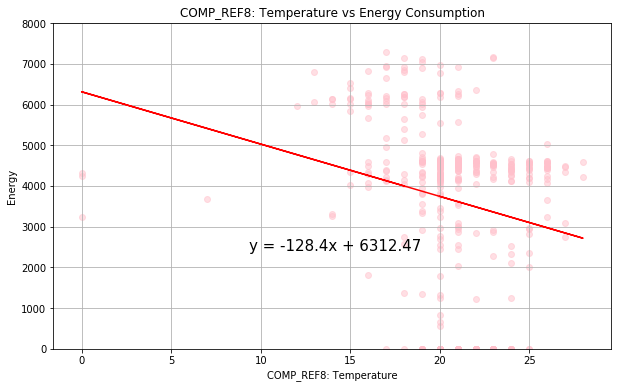

In [204]:
x_values = devices_data8["Temp"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF8: UV| 
    The correlation is -0.2
    The LinregressResult(slope=-448.36935900114287, intercept=6097.370620167388, rvalue=-0.1965708844235309, pvalue=0.0001538640395810585, stderr=117.2219768042616)
    


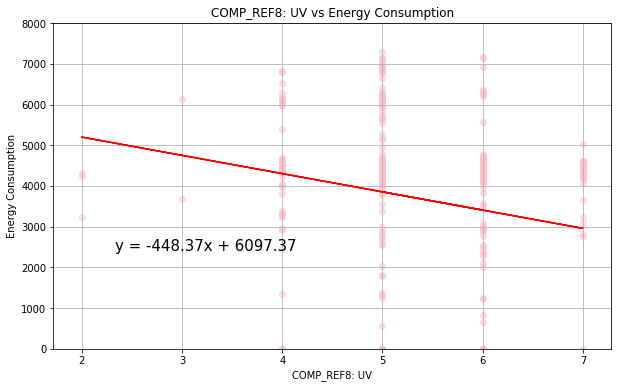

In [205]:
x_values = devices_data8["UV"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Precipitation MM| 
    The correlation is -0.05
    The LinregressResult(slope=-21.230170515648542, intercept=3711.7482511866574, rvalue=-0.045893819094331115, pvalue=0.3813244983068673, stderr=24.220926066069588)
    


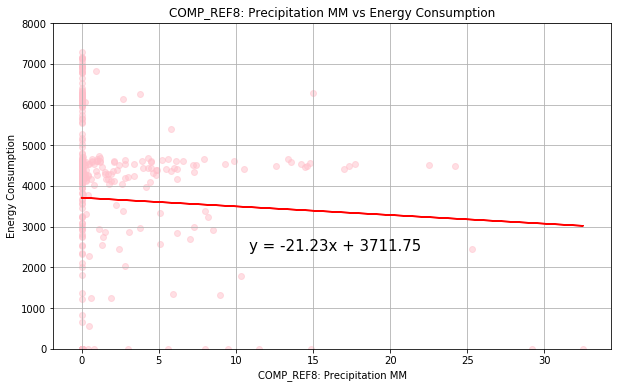

In [206]:
x_values = devices_data8["PrecMM"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Humidity| 
    The correlation is 0.21
    The LinregressResult(slope=23.860938260013405, intercept=2474.169040411185, rvalue=0.20739769698004984, pvalue=6.395266539295032e-05, stderr=5.899099645528033)
    


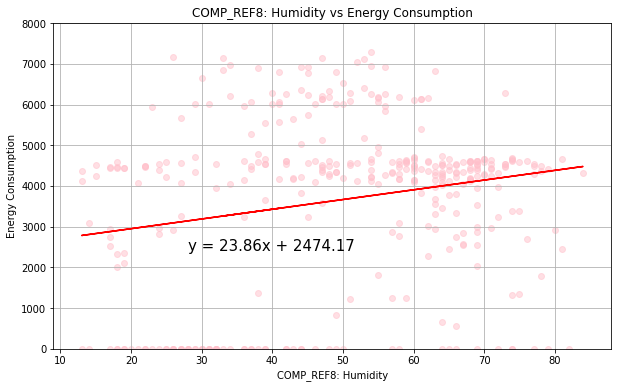

In [207]:
x_values = devices_data8["Hum"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Heat| 
    The correlation is -0.24
    The LinregressResult(slope=-172.82533635536763, intercept=7225.265242850293, rvalue=-0.2385881006479848, pvalue=3.918255019950586e-06, stderr=36.87068622472346)
    


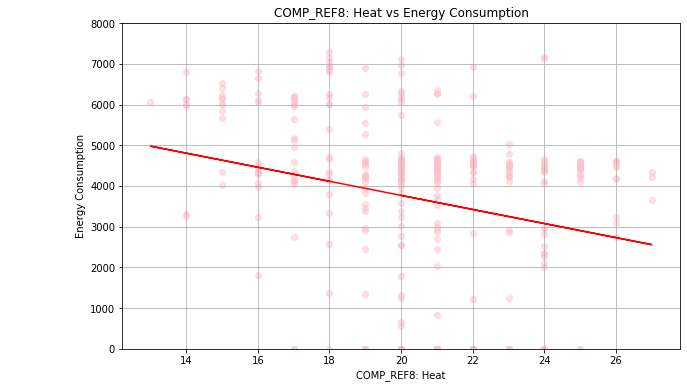

In [208]:
x_values = devices_data8["Heat"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Dew Point| 
    The correlation is 0.19
    The LinregressResult(slope=66.32075212534943, intercept=3183.282634794905, rvalue=0.19031211435206755, pvalue=0.00025029927355021893, stderr=17.931704121950315)
    


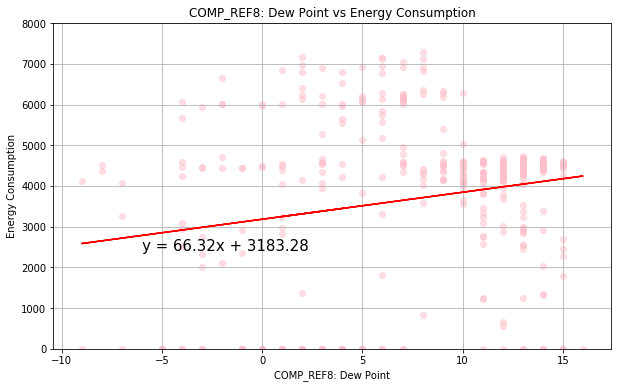

In [209]:
x_values = devices_data8["DP"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Wind Chill| 
    The correlation is -0.27
    The LinregressResult(slope=-186.15963858454685, intercept=7444.088266280745, rvalue=-0.26913637487842423, pvalue=1.7131121915667734e-07, stderr=34.91682582943081)
    


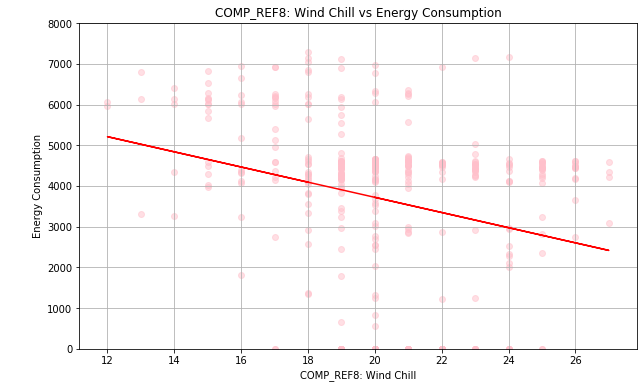

In [210]:
x_values = devices_data8["WChill"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Feel Like| 
    The correlation is -0.26
    The LinregressResult(slope=-182.24568210174874, intercept=7368.236016632749, rvalue=-0.2641696334311595, pvalue=2.9291027624042934e-07, stderr=34.87507838042141)
    


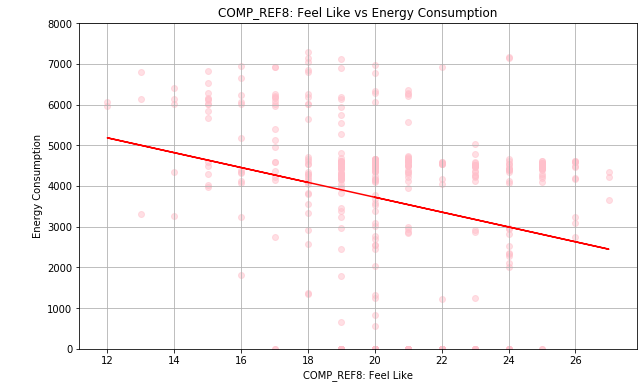

In [211]:
x_values = devices_data8["FLike"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E097B2D30>,
      dtype=object)

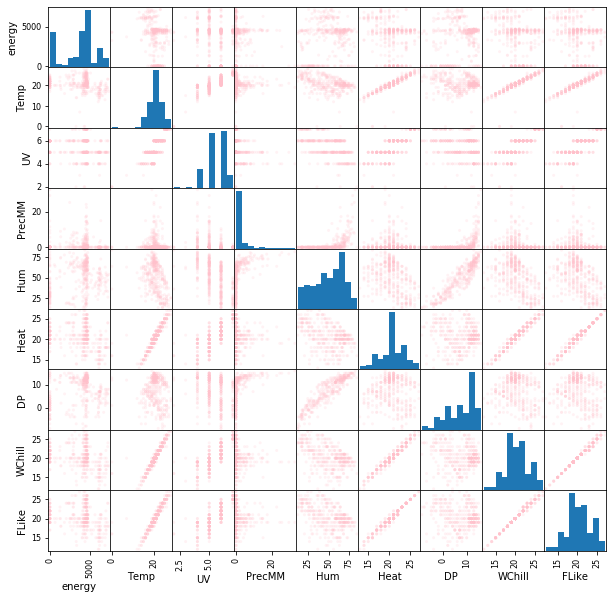

In [212]:
pd.plotting.scatter_matrix(devices_data8.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "pink")

## How is it correlated the production and the energy consumption?

In [213]:
# Luis

In [214]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [215]:
# Luis

## Define the energy consumption curve for each season of the year.

In [216]:
# Lupita

## For each group of devices, rank them by cost.


In [217]:
# Lupita

## Anual base line for each device.  

In [218]:
# Daniel

## Make production recommendations, based on the optimal production. 

In [219]:
# Daniel